# Homework 6 Solutions

Due by Feb 25th, 3:30 pm

## Instructions

* This submission has **one** component: 
   * iPython notebook with coded solution to problems 1, 2, 3 and 4

Make sure your solutions are clear and legible!

### Other important information

* __Make sure to title the homework assignment as LASTNAME_FIRSTNAME_Homework6 before submitting.__

* All plots generated must have an xlabel, a ylabel, and a caption that interprets the plot. Time profiles also require a legend. 

* To create a caption, add a new cell below a plot by using the option "Insert > Insert Cell below", then change the cell into a markdown cell by using "Cell > Cell Type > Markdown".

* Axis limits must be sensible, meaning that you may need to set the axis limits via kwargs "xlim" and "ylim" in order to make your plot more interpretable. 


## Useful Reading For This Assignment:

- Masspy: https://masspy.readthedocs.io/en/master/notebooks/SB2_textbook/SB2-Chapter-11.html

- Pandas Dataframes: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
    - The bare minimum: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame

- Pyplot Introduction: https://matplotlib.org/tutorials/introductory/pyplot.html

- Numpy Linspace function: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html


In [1]:
# Import stuff

from mass import (MassModel, MassMetabolite, MassReaction, Simulation, MassSolution, strip_time)
from mass.test import create_test_model
from mass.util.matrix import nullspace, left_nullspace, matrix_rank
from mass.visualization import (plot_time_profile, plot_phase_portrait, plot_tiled_phase_portraits)
import mass
from os import path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym

### Problem 1: Pyruvate and Lactate in the Glycolytic Pathway (16 Points)

__Import the Glycolysis test model from test data. __

In [2]:
glycolysis = create_test_model("SB2_Glycolysis")
ppp = create_test_model("SB2_PentosePhosphatePathway")
pd.set_option('display.max_columns', None)

> **(i)** Change the concentration of pyruvate from 0.0603 to 0.11 mM. Discuss and interpret the response. Examine the mass action ratio for LDH_L in another plot. Discuss and interpret the response.

> **(ii)** Change the concentration of lactate from 1.36 to 0.4 mM in a seperate simulation. Discuss and interpret the response. Examine the mass action ratio for LDH_L in another plot. Discuss and interpret the response.

__Grading__:

- **(i)**
     - +2 for changing the concentration of pyruvate and showing a correctly labeled plot of its response
     - +2 for discussing and interpreting the response correctly.
     - +2 for showing a graph of the mass action ratio for LDH_L
     - +2 for interpreting the graph correctly


<font color='red'> Note:</font> It is permissable, and recommended, that the analysies of both are combined into a two to three sentence caption of each graph. To get the points for the analysis portion of each question, the student needs to analyze the behavior of each graph in response to the perturbation.
- **(ii)**
     - +2 for changing the concentration of lactate and showing a correctly labeled plot of its response, 
     - +2 for discussing and interpreting the response correctly.
     - +2 for showing a graph of the mass action ratio for LDH_L
     - +2 for interpreting the graph correctly

__Total__: **16 Points**

> **(i)**

Getting time points
Parsing perturbations
Setting simulation values for 'Glycolysis'
Simulating 'Glycolysis'
Simulation for 'Glycolysis' successful
Adding 'Glycolysis' simulation solutions to output
Updating stored solutions


mass/visualization/visualization_util.py:806 UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


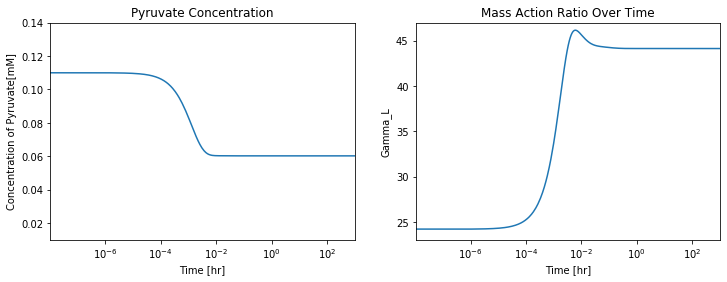

In [3]:
"""SOLUTION GOES HERE """
# Define pyruvate metabolite

# Define time range
(t0, tf) = (0, 1000)

# Simulate with a perturbation to the pyr_c initial concentration
sim = Simulation(glycolysis)
conc_sol, flux_sol = sim.simulate(glycolysis, time = (t0, tf),  verbose=True,perturbations={"pyr_c":0.11})

# Define mass action ratio for LDH_L
pool_id = "Gamma_L"
pool = "(lac__L_c*nad_c)/(nadh_c*pyr_c)"

# Obtain solution for LDH_L mass action ratio 
recovery = conc_sol.make_aggregate_solution(
    aggregate_id=pool_id,
    equation=pool,
    variables=["lac__L_c", "nad_c","nadh_c","pyr_c"],
    update=True)
conc_sol.update(recovery)

# Create a figure instance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
(ax1, ax2) = axes.flatten()

# Plot the pyr_c concentration over time on a linear log plot 
plot_time_profile(conc_sol,observable="pyr_c", ax=ax1, plot_function="semilogx",
                xlim =(t0,tf),ylim=(0.01,0.14),xlabel="Time [hr]", ylabel="Concentration of Pyruvate[mM]",
                title=("Pyruvate Concentration"))

# Plot the LDH_L mass action ratio over time on a linear log plot 
plot_time_profile(conc_sol,observable=pool_id, ax=ax2, plot_function="semilogx",
                xlim =(t0,tf),ylim=(23,47),xlabel="Time [hr]", ylabel=pool_id,
                title=("Mass Action Ratio Over Time"))

<font color='red'> Explanation:</font> 
When the perturbation is applied to the system, the pyruvate concentration is initially increased, with a consequentially decreased Mass Action Ratio. Over the 10^-4 to 10^-2 hour time scale, pyruvate is converted into lactate by LDH, which causes an overshoot, which then in turn is corrected for by the lactate exchange, lowering it to its new level. Steady state is then reached after t=1 hour.

> **(ii)**

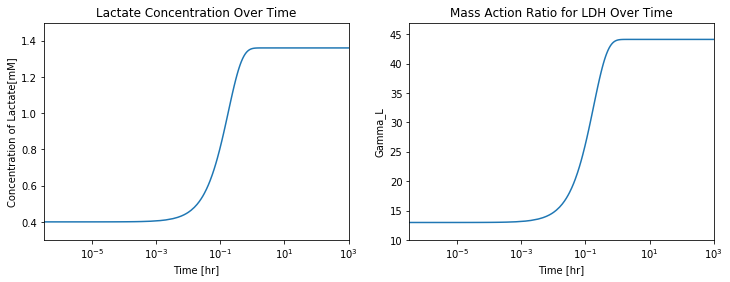

In [4]:
"""SOLUTION GOES HERE """
# Define time range
(t0, tf) = (0, 1000)

# Simulate with a perturbation to the pyr_c initial concentration
sim = Simulation(glycolysis)
conc_sol, flux_sol = sim.simulate(glycolysis, time = (t0, tf),  verbose=False,perturbations={"lac__L_c":0.4})

# Define mass action ratio for LDH_L
pool_id = "Gamma_L"
pool = "(lac__L_c*nad_c)/(nadh_c*pyr_c)"

# Obtain solution for LDH_L mass action ratio 
recovery = conc_sol.make_aggregate_solution(
    aggregate_id=pool_id,
    equation=pool,
    variables=["lac__L_c", "nad_c","nadh_c","pyr_c"],
    update=True)
conc_sol.update(recovery)

# Create a figure instance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
(ax1, ax2) = axes.flatten()

# Plot the lac__L_c concentration over time on a linear log plot 
plot_time_profile(conc_sol,observable="lac__L_c", ax=ax1, plot_function="semilogx",
                xlim =(t0,tf),ylim=(0.3,1.5),xlabel="Time [hr]", ylabel="Concentration of Lactate[mM]",
                title=("Lactate Concentration Over Time"))

# Plot the LDH_L mass action ratio over time on a linear log plot 
plot_time_profile(conc_sol,observable=pool_id, ax=ax2, plot_function="semilogx",
                xlim =(t0,tf),ylim=(10,47),xlabel="Time [hr]", ylabel=pool_id,
                title=("Mass Action Ratio for LDH Over Time"))

<font color=red>Interpretation:</font>
Since the concentration of pyruvate has been increased, there is a decreased amount of of lactate, causing a decrease in the mass action ratio. However, eventually, the mass action ratio increases to its previous value due to the lactate exchange reaction. Correspondingly, we see that lactate and the mass action ratio of the LDH reaction follow each other over time.

### Problem 2 (32 Points):

Import the Pentose Phosphate Pathway from test data:

In [5]:
ppp = create_test_model("SB2_PentosePhosphatePathway")
from mass.util.matrix import nullspace, left_nullspace, matrix_rank

Consider the production of E4P by the pentose pathway. Add a removal reaction to Table 11.3 (https://masspy.readthedocs.io/en/latest/notebooks/SB2_textbook/SB2-Chapter-11.html#The-biochemical-reactions) for E4P and add a corresponding column to the stoichiometric matrix.

> **(i)** Evaluate the rank of S and the dimensions of the null spaces. How do they change?

> **(ii)** Use first-order removal kinetics: $$v_{\mathrm{E4P_{r}}} = k_{\mathrm{E4P_{r}}}\text{E4P} \\ $$
Put the rate constant for the removal rate to zero \\(k_{\mathrm{E4P_{r}}} = 0\\). The steady state should be unaltered. 



> **(iii)** Change \\(k_{\mathrm{E4P_{r}}}\\) to a finite number in order to remove 1% of the incoming pentose pathway flux as E4P. What happens? **(Note: for consistency, please use a relative tolerance of 0.00001 for your steady state solver.)**
>> ##### The code for setting the relative tolerance for your steady state solver is:
>>> - sim.steady_state_solver.relative_tolerance = 0.00001
>> ##### To solve part **(iii)**, do the following:
>>> - *(a) Make an initial guess for kf (must be reasonable)*.
>>> - *(b) Expand the range to be the initial guess +- 0.01 with stepsize of 0.001*.
>>> - (c) *Plot kf vs flux out. Determine what kf value produces a 1% flux out*. ***There is a margin of error of approximately 10^-4 or about 0.0001***


>**(iv)** Increase this percentage to two more significant numbers *(100x, 1000x)*. Can you exceed the input flux into the oxidative branch of the pentose pathway through \\(v_{\mathrm{G6PDH}}\\)? Explain why or why not.

__Grading:__
   
   - **(i)** 
        - +2 points for  the rank, and dimensions of the nullspaces before adding the removal reaction.
        - +2 points for the rank, and dimensions of the nullspaces after adding the removal reaction.
        - +4 for correct analysis of the change of the nullspace dimension and rank 
           due to adding the new reaction.
           
   - **(ii)**
        - +2 points for finding the correct amount to increase the e4p demand flux to and showing work about how                to get said value
        
        - +2 points for code to obtain the steady state flux going in to the system and out of the system before                changing the kf for the demand reaction.
   - **(iii)**
        - +2 points for a reasonable initial approximation of kf.
        - +2 points for setting up a graph of flux out vs kf.
        - +2 points for setting up the code that finds the kf at 0.002100 or some alternative method (graphical interpretation witin 1e-4 correct)
        - +2 and then simulates the system with that perturbation and graphs it
        - +2 points for correct analysis of the flux and the concentration graph over time.
   - **(iii)**
       
        - +2 points for the code that multiplies kf times 100 and graphs the result
        - +2 points for the code that multiplies kf times 1000 and graphs the result
        - +6 Points for the analysis of the behavior of the system as kf for the removal reaction increases as seen from the two graphs
 
__Total:__ __32 Points__
        

> **(i)**

In [6]:
DM_e4p_e = ppp.remove_boundary_conditions([
    "e4p_c"])
length = len(ppp.reactions)-1
ppp.remove_reactions(ppp.reactions[length])
print("Before adding removal reaction:\n-------------------------------")
print("Matrix Rank: " + str(matrix_rank(ppp.S)))
print("Dimensions of S: " + str(ppp.S.shape))
print("Dimensions of RNS: " + str(nullspace(ppp.S).shape[1]))
print("Dimensions of LNS: " + str(left_nullspace(ppp.S).shape[0]))

/anaconda2/envs/MasspyEnv/lib/python3.7/site-packages/cobra/core/model.py:716 UserWarning: need to pass in a list


Before adding removal reaction:
-------------------------------
Matrix Rank: 15
Dimensions of S: (17, 16)
Dimensions of RNS: 1
Dimensions of LNS: 2


In [7]:
DM_e4p_e = ppp.add_boundary("e4p_c", boundary_type="demand", 
                            boundary_condition=0.)

print("\nAfter adding removal reaction:\n-------------------------------")
print("Matrix Rank: " + str(matrix_rank(ppp.S)))
print("Dimensions of S: " + str(ppp.S.shape))
print("Dimensions of RNS: " + str(nullspace(ppp.S).shape[1]))
print("Dimensions of LNS: " + str(left_nullspace(ppp.S).shape[0]))


After adding removal reaction:
-------------------------------
Matrix Rank: 15
Dimensions of S: (17, 17)
Dimensions of RNS: 2
Dimensions of LNS: 2


<font color=red>Interpretation:</font>
When we add a new reaction, the rank of the matrix does not change, indicating that we have simply added a dimension into a nullspace. This is apparent when comparing the right nullspace values between the model without the demand and the model with the demand.

> **(ii)**

<font color=red>Note:</font>
The flux into the PPP through G6PDH2r is 0.21. The fluxes out of the PPP are DM_r5p_e, DM_g3p_e, DM_f6p_e, DM_e4p_e. 

Since fluxes out must equal fluxes in, therefore, we want to increase the flux of DM_e4p_e from 0 to 0.0021 (1% removal). 

In [8]:
ppp = create_test_model("SB2_PentosePhosphatePathway")
DM_e4p_e = ppp.add_boundary("e4p_c", boundary_type="demand", 
                            boundary_condition=0.)
chop = 6
DM_e4p_e.kf = 0
t0, tf = (0, 1000)
sim = Simulation(ppp,verbose=False)
sim.steady_state_solver.relative_tolerance = 0.00001
conc_sol, flux_sol = sim.find_steady_state(ppp, strategy ='simulate',verbose=False,tfinal=1e10)
flux_in = round(flux_sol["SK_g6p_c"],chop)
flux_out = round(flux_sol["DM_e4p_c"], chop)

print("Initial flux in: " + str(flux_in))
print("Initial flux out: " + str(flux_out))

print("For 1% removal, flux out must be " + str(flux_in/100) + "\n")

Initial flux in: 0.21
Initial flux out: 0.0
For 1% removal, flux out must be 0.0021



The loop based approach for finding the precise kf_value

In [9]:
kf_value = 0.42
break_condition = lambda fo: flux_in/100 -fo 
while abs(break_condition(flux_out)) > 1e-6:
    conc_sol, flux_sol = sim.find_steady_state(ppp, strategy ='simulate',verbose=False,tfinal=1e10,perturbations={"kf_DM_e4p_c":kf_value})
    flux_out = flux_sol["DM_e4p_c"]
    print('When DM_e4p_c.kf = {0:.6f}, the flux out is {1:.6f}'.format(kf_value, flux_out))
    if break_condition(flux_out) > 1e-6:
        kf_value += 0.01
    elif break_condition(flux_out) < -1e-6:
        kf_value += -0.001
    else:
        pass

When DM_e4p_c.kf = 0.420000, the flux out is 0.002090
When DM_e4p_c.kf = 0.430000, the flux out is 0.002139
When DM_e4p_c.kf = 0.429000, the flux out is 0.002134
When DM_e4p_c.kf = 0.428000, the flux out is 0.002129
When DM_e4p_c.kf = 0.427000, the flux out is 0.002124
When DM_e4p_c.kf = 0.426000, the flux out is 0.002119
When DM_e4p_c.kf = 0.425000, the flux out is 0.002114
When DM_e4p_c.kf = 0.424000, the flux out is 0.002109
When DM_e4p_c.kf = 0.423000, the flux out is 0.002104
When DM_e4p_c.kf = 0.422000, the flux out is 0.002100


The graphical approach for finding kf_value

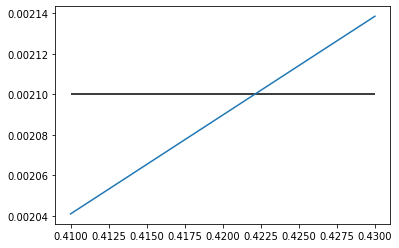

The Value of kf that creates an outward flux of 0.0021 is
0.4221105


In [10]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

#Solution for Generating a Plot of the kf versus flux out graph

x = np.linspace(0.41,0.43,200)
y = []
for i in x:
    conc_sol, flux_sol = sim.find_steady_state(ppp, strategy ='simulate',verbose=False,tfinal=1e10,perturbations={"kf_DM_e4p_c":i})
    flux_out = flux_sol["DM_e4p_c"]
    y.append(flux_out)
    
data = {'x':x, 'y':y}
dataframe = pd.DataFrame(data)
plt.xscale("linear")
plt.plot(dataframe['x'],dataframe['y'])
plt.hlines(y=0.00210,xmin=0.41,xmax=0.43)
plt.grid = True
plt.show()
dataframe2 = dataframe.round(6)
print("The Value of kf that creates an outward flux of 0.0021 is\n" + str(dataframe2.loc[dataframe2["y"] == 0.00210]["x"].mean()))


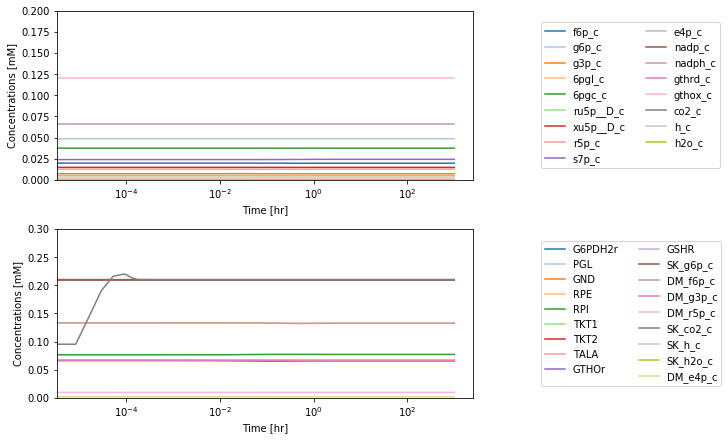

In [11]:
   
conc_sols, flux_sols = sim.simulate(ppp, time=(t0, tf), perturbations={"kf_DM_e4p_c": kf_value})
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), constrained_layout=True)

(ax1, ax2) = axes.flatten()

plot_time_profile(conc_sols, ax=ax1, legend="right outside",
                plot_function="semilogx", ylim=(0, .2),
                xlabel="Time [hr]", ylabel="Concentrations [mM]");

plot_time_profile(flux_sols, ax=ax2, legend="right outside",
                plot_function="semilogx", ylim=(0, .3),
                xlabel="Time [hr]", ylabel="Concentrations [mM]");

<font color=red>Interpretation:</font>
From the two graphs above, we can see that the addition of a 1 percent removal rate does not signifigantly alter the steady state fluxes of the metabolites, with the exception of the CO2 sink flux, which goes up from around 0.1 to just over 0.2.

<font color= red> (iv) </font>

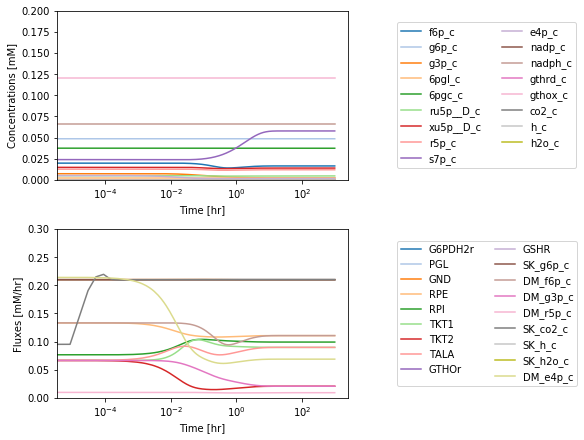

In [12]:
conc_sol, flux_sol = sim.simulate(ppp, time=(t0, tf), perturbations={"kf_DM_e4p_c": kf_value*100})
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), constrained_layout=True)

(ax1, ax2) = axes.flatten()

plot_time_profile(conc_sol, ax=ax1, legend="right outside",
                plot_function="semilogx", ylim=(0, .2),
                xlabel="Time [hr]", ylabel="Concentrations [mM]");

plot_time_profile(flux_sol, ax=ax2, legend="right outside",
                plot_function="semilogx", ylim=(0, .3),
                xlabel="Time [hr]", ylabel="Fluxes [mM/hr]");

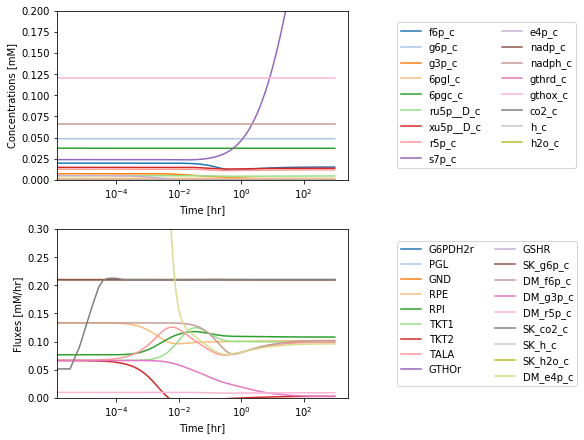

In [13]:
conc_sol, flux_sol = sim.simulate(ppp, time=(t0, tf), perturbations={"kf_DM_e4p_c": kf_value*1000})
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), constrained_layout=True)

(ax1, ax2) = axes.flatten()

plot_time_profile(conc_sol, ax=ax1, legend="right outside",
                plot_function="semilogx", ylim=(0, .2),
                xlabel="Time [hr]", ylabel="Concentrations [mM]");

plot_time_profile(flux_sol, ax=ax2, legend="right outside",
                plot_function="semilogx", ylim=(0, .3),
                xlabel="Time [hr]", ylabel="Fluxes [mM/hr]");

<font color=red>Interpretation:</font>
by Increasing the e4p demand flux, we can drive more and more flux into the pentose phosphate pathway by mass action. However, it is not possible to direct 100% of the flux entering the system into the pentose phosphate pathway, as some flux will always go into glycolysis. Eventually, as more flux exits the system through the e4p demand reaction, there will be a greater build up of s7p, which reacts to form e4p with g3p. 

### Problem 3 (34 Points)

> **(i)** Combine the test glycolysis and pentose phosphate pathway models. Remove any unncessary reactions. Display the stoichiometric matrix as a pandas DataFrame. 

> **(ii)** Determine the steady state flux map. Display the steady state flux vector as a pandas DataFrame.

> **(iii)** Calculate the PERCs. Display the PERCs and the steady state fluxes as a pandas DataFrame with the reactions as the columns, and 2 rows representing the fluxes, and PERCs respectively. Compared to the original parameters, are there any significant PERCs changes? If so, why?

> **(iv)** Update your model to steady state and plot the steady state concentrations as verification.

__Grading:__
  
  - **(i)**
       - +2 for code that combines the test glycolysis and pentose phosphate models. Deduct points if they do not              create fresh instances of the models
       - +2 for code that removes unnessecary reactions
       - +2 for a correct updated S matrix displayed as a dataframe
  - **(ii)**
       - +4 for finding and using the minspan pathway
       - +4 for the code that finds the steady state fluxes
       - +2 for displaying the steady state flux vectors as a dataframe
  - **(iii)**
       - +2 for calculating percs using the calculate perc function
       - +4 for obtaining and outputing a dataframe for their new PERCS
       - +2 for showing the differences between the PERCS and the original reaction parameters. Can be by creating a dataframe substracting the parameters from the percs over the parameters, or by explaining process used to examine differences between parameters and percs. Basically these two points are for them showing their work; actually comparing the two sets of values.
       - +6 for correct identification of the biggest change between the PERCs and the parameters, as well as why
  - **(iv)**
       - +2 for updating the model to steady state
       - +2 for plotting the steady state concentrations as verification
  
__Total: 34 Points__
        
        

In [14]:
#Code taken from the Masspy Documentation.
#To Combine The Two Models:
glycolysis = create_test_model("SB2_Glycolysis")
ppp = create_test_model("SB2_PentosePhosphatePathway")
fullppp = glycolysis.merge(ppp, inplace=False)
fullppp.id = "Full_PPP_Model"

#There are obsolete boundary reactions that must be removed
for boundary in fullppp.boundary:
    print(boundary)
#Let's Remove Them:
fullppp.remove_reactions([
    r for r in fullppp.boundary
    if r.id in ["SK_g6p_c", "DM_f6p_c", "DM_g3p_c", "DM_r5p_c"]])
fullppp.remove_boundary_conditions([
    "g6p_c", "f6p_c", "g3p_c", "r5p_c"])

fullppp.update_S("DataFrame")

Ignoring reaction 'SK_h_c' since it already exists.
Ignoring reaction 'SK_h2o_c' since it already exists.


DM_amp_c: amp_c --> 
SK_pyr_c: pyr_c <=> 
SK_lac__L_c: lac__L_c <=> 
SK_glc__D_c:  <=> glc__D_c
SK_amp_c:  <=> amp_c
SK_h_c: h_c <=> 
SK_h2o_c: h2o_c <=> 
SK_g6p_c:  <=> g6p_c
DM_f6p_c: f6p_c --> 
DM_g3p_c: g3p_c --> 
DM_r5p_c: r5p_c --> 
SK_co2_c: co2_c <=> 


,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,LDH_L,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_co2_c
glc__D_c,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g6p_c,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6p_c,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
fdp_c,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dhap_c,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g3p_c,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
_13dpg_c,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_3pg_c,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_2pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color=red>Solution for (i) above.

<font color=red>**(ii)** Solution</font>

In [15]:
minspan_paths = np.array([
    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0, 0, 1,-1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1,-2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,13,-3, 3, 3, 3, 2, 1, 1, 1, 1, 6, 6, 3]])

independent_fluxes = {
    fullppp.reactions.SK_glc__D_c: 1.12, 
    fullppp.reactions.DM_nadh: .2*1.12, 
    fullppp.reactions.SK_amp_c: 0.014, 
    fullppp.reactions.GTHOr: 0.42}
sim = Simulation(fullppp)
ssfluxes = fullppp.compute_steady_state_fluxes(
    minspan_paths, independent_fluxes, update_reactions=True)
pd.DataFrame(ssfluxes.values(), index=[r.id for r in fullppp.reactions], columns=[r"$\textbf{v}_{\mathrm{stst}}$"]).T

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,LDH_L,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_co2_c
$\textbf{v}_{\mathrm{stst}}$,1.12,0.91,1.05,1.05,1.05,2.17,2.17,2.17,2.17,2.17,1.946,0.014,0.0,0.224,1.946,2.17,0.224,1.12,0.014,3.458,-0.21,0.21,0.21,0.21,0.14,0.07,0.07,0.07,0.07,0.42,0.42,0.21


<font color=red>**(iii)** Solution</font>

In [16]:
x = pd.DataFrame([[r.steady_state_flux for r in fullppp.reactions],
              [r.kf for r in fullppp.reactions]],
             index=[r"$\textbf{v}_{\mathrm{stst}}$", r"$k_{f}$"],
             columns=[r.id for r in fullppp.reactions])
x

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,LDH_L,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_co2_c
$\textbf{v}_{\mathrm{stst}}$,1.120000,0.910000,1.050000,1.050000,1.050000,2.170000,2.170000e+00,2.170000,2.170000,2.170000,1.946000,0.014000,0.0,0.224000,1.946,2.17,0.22400,1.12,0.014,3.458,-0.21,0.210000,0.210000,0.210000,0.140000,0.070000,0.070000,0.070000,0.070000,0.420000,0.420000,0.21
$k_{f}$,0.700007,3644.444444,35.368784,2834.567901,34.355728,3376.749242,1.273531e+06,4868.589299,1763.740525,454.385552,1112.573989,0.161424,100000.0,744.186047,5.600,1.40,7.44186,1.12,0.014,100000.000,100000.00,21864.589249,122.323112,29287.807474,15284.677111,10564.620051,1595.951975,1092.246435,844.616138,53.329812,0.041257,100000.00


In [17]:
percs = fullppp.calculate_PERCs(update_reactions=True);

y = pd.DataFrame([[r.steady_state_flux for r in fullppp.reactions],
              [r.kf for r in fullppp.reactions]],
             index=[r"$\textbf{v}_{\mathrm{stst}}$", r"$k_{f}$"],
             columns=[r.id for r in fullppp.reactions])
y

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,LDH_L,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_co2_c
$\textbf{v}_{\mathrm{stst}}$,1.120000,0.910000,1.050000,1.050000,1.050000,2.170000,2.170000e+00,2.170000,2.170000,2.170000,1.946000,0.014000,0.0,0.224000,1.946000,2.17000,0.22400,1.12,0.014,3.458000,-0.21,0.210000,0.210000,0.210000,0.140000,0.070000,0.070000,0.070000,0.070000,0.420000,0.420000,0.21
$k_{f}$,0.700007,2961.111111,33.158235,2657.407407,32.208495,3271.225828,1.233733e+06,4716.445884,1708.623634,440.186003,1073.942947,0.161424,100000.0,744.186047,5.405556,1.35625,7.44186,1.12,0.014,128645.833333,100000.00,21864.589249,122.323112,29287.807474,16048.910967,9645.957438,1675.749573,1146.858757,886.846945,53.329812,0.041257,100000.00


In [18]:
#Checking The Numerical Values of the Changes to the PERCs
z = (y-x)/x *100
z

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,LDH_L,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_co2_c
$\textbf{v}_{\mathrm{stst}}$,0.0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000000,0.0,NaN,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,-0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
$k_{f}$,0.0,-18.75,-6.25,-6.25,-6.25,-3.125,-3.125,-3.125,-3.125,-3.125,-3.472222,0.0,0.0,0.0,-3.472222,-3.125,0.0,0.0,0.0,28.645833,0.0,-1.663868e-14,-1.161747e-14,-1.242148e-14,5.0,-8.695652,5.0,5.0,5.0,-1.332356e-14,-1.681856e-14,0.0


<font color=red>Interpretation:</font>
The Most changed flux is PGI. Due to the presence of G6PDH2r, more flux will be drawn away from PGI (and ergo glycolysis) and towards the pentose phosphate pathway. Furthermore, because there is more flux going into the pentose phosphate pathway than would normally occur in its isolated model, the PERC for PGI is lower corresponding to the decrease in PGI flux.

> **(iv)**

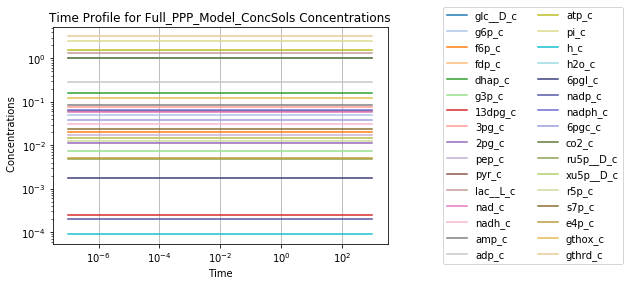

In [19]:
sim_fullppp = Simulation(fullppp)
sim_fullppp.find_steady_state(fullppp,strategy="simulate",update_values=True)

t0 =0.0000001
tf =1000
conc_sol,flux_sol = sim_fullppp.simulate(fullppp,time=(t0,tf))
conc_sol.view_time_profile()

### Problem 4 (18 Points):
Using your intergrated model from the previous problem...
> **(i)** Simulate a 1.5x increase in the rate of reduced glutathione (gthrd_c) utilization as shown in Figure 11.19.(https://masspy.readthedocs.io/en/master/notebooks/SB2_textbook/SB2-Chapter-11.html#Response-to-an-increased-rate-of-GSH-utilization)

> **(ii)** Plot the concentrations of 6-Phospho-D-gluco-1,5-lactone (6pgl_c) and 6-Phospho-D-gluconate (6pgc_c) as a function of time and explain what you observe. 

__Expected Output__: At least 3 figures, 2 time profiles and 1 phase portrait, and a caption in a markdown cell interpreting the results.

__Grading:__
   
   - **(i)**
       - +2 for simulating a 1.5x increase in reduced glutahione utilization
   - **(ii)**
       - +6 for three graphs with propper labels and units
       - +10 for correct analysis of the behavior of the concentrations of 6pgl and 6pgc as a function of time, with at least some connection between their graphs and their analysis.
       
__Total: 18 Points__

> **(i)**

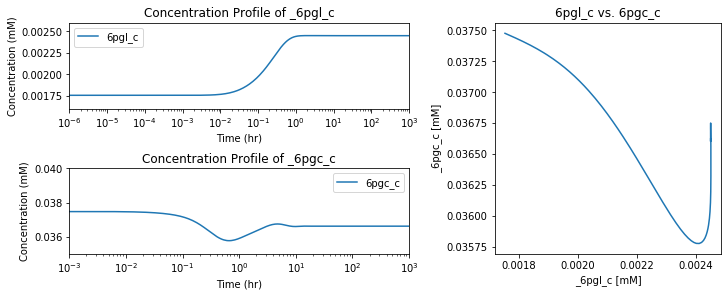

In [21]:
(t0,tf) = (0,1000)
sim = Simulation(fullppp)
conc_sol,flux_sol= sim.simulate(fullppp,time=(t0,tf),perturbations={"kf_GSHR":"1.5*kf_GSHR"})
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1.5, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])
 #Optional

plot_time_profile(conc_sol, observable=["_6pgl_c"], ax=ax1, legend=["best"],
                xlim=(1e-6, 1e3),ylim=(0.0016,0.0026), plot_function="semilogx",
                xlabel="Time (hr)", ylabel="Concentration (mM)", 
                title=("Concentration Profile of _6pgl_c"));

plot_time_profile(conc_sol, observable=["_6pgc_c"], ax=ax2, legend=["best"],
                xlim=(1e-3, 1e3),ylim=(0.035,0.04), plot_function="semilogx",
                xlabel="Time (hr)", ylabel="Concentration (mM)", 
                title=("Concentration Profile of _6pgc_c"));

plot_phase_portrait(conc_sol, x="_6pgl_c", y="_6pgc_c", ax=ax3,
                    xlabel="_6pgl_c [mM]", ylabel= "_6pgc_c [mM]", 
                    title=("6pgl_c vs. 6pgc_c"))

<font color=red>Interpretation:</font> At around t = 10^-1, we see a decrease in the conversion of 6pgl_c to 6pgc_c due to the 1.5 times increase in the GSH utilization rate. Looking at Figure 11.6 in the masspy textbook, we can see that an increase in GSHR in turn drives the faster GTHOr reaction forward, which then pulls substrates from the upper pentose phosphate pathway to generate nadph due to nadp being formed by GTHOr, and this, on a time scale of about 10^-1 hours, is where we see an increase in 6pgl, due to G6PDH2R being also increased in flux due to the increase of nadp. Since G6PDH2r has a much higher kf and is irreversible, we see an immediate increase in 6pgl before the decrease in 6pgc. The decrease in 6pgc is the result of the increased amount of 6pgl decreasing the mass action trend, and decreasing flux through PGL, at least until the time scale that PGL is on, where PGL converts 6pgl to 6pgc, which in turn then undershoots between 10^0 and 10^1 due to the increased rate of GND pulling the flux through the network. Finally the reason why 6pgl does not decrease once it reaches its new steady state, is that the reaction that generates it, G6PDH2r, is very fast, and thus maintains it at a level commersurate with a higher nadp level.